In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
import sys
from astropy.io import fits 
import astropy.convolution as apconv
import pyflct
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [2]:
# Loading Ivan's data

cube = fits.open("SSD_25_8Mm_16_pdmp_1_I_500.fits")[0].data
np.shape(cube) # checking shape

(361, 768, 768)

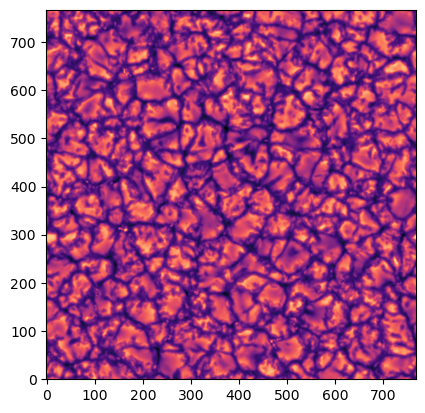

In [3]:
# Let's plot and see how it looks
plt.imshow(cube[5,:,:], origin='lower', cmap='magma')

In [4]:
# Taking out a few slices
cube = cube[:5,:,:]
np.shape(cube)

(5, 768, 768)

In [5]:
# Defining FWHM, delta_t and pixelsize
FWHM = 2400 # km
delta_t = 30 # s
pixelsize = 32 # km
sigma = FWHM/1.665/pixelsize
print(sigma)

45.04504504504504


In [6]:

Vel_x_I = []
Vel_y_I = []
Vm_I = []
for j in range(1, len(cube)):
    vel_x, vel_y, vm = pyflct.flct(cube[j-1], cube[j], delta_t, pixelsize, sigma)
    Vel_x_I.append(vel_x)
    Vel_y_I.append(vel_y)
    Vm_I.append(vm)

Vel_x_I = np.asarray(Vel_x_I)
Vel_y_I = np.asarray(Vel_y_I)
Vm_I = np.asarray(Vm_I)


flct: nominal sliding box size = 192
flct: mean value of gamma^2/sigma^2 = 0.0133381

flct: finished
flct: nominal sliding box size = 192
flct: mean value of gamma^2/sigma^2 = 0.0133623

flct: finished
flct: nominal sliding box size = 192
flct: mean value of gamma^2/sigma^2 = 0.0133657= 59 out of 767

flct: finished
flct: nominal sliding box size = 192
flct: mean value of gamma^2/sigma^2 = 0.013358 = 59 out of 767

flct: finished


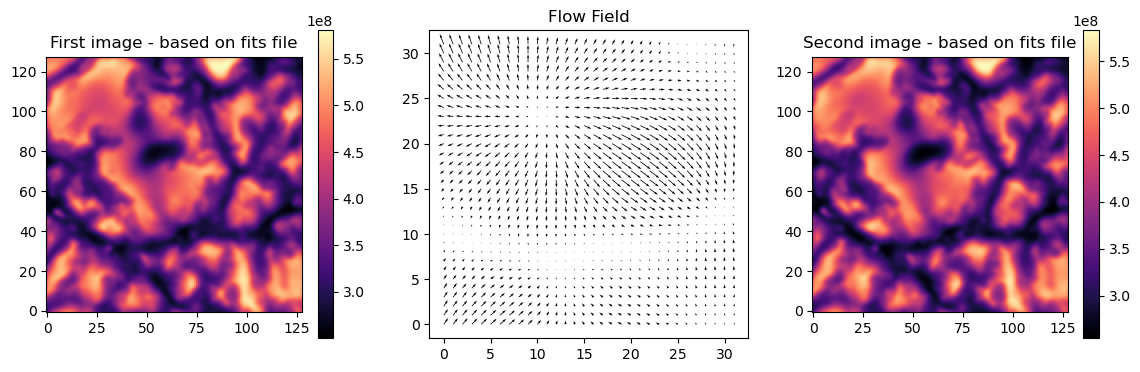

In [7]:
# Trying out intensity as windowing parameter

image1 = cube[0]
image2 = cube[1]
i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
ax1.set_xlabel = ("X pixel")
ax1.set_ylabel = ("Y pixel")
plt.imshow(image1[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First image - based on fits file")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vel_x_I[0,i_start:i_end:4, j_start:j_end:4], Vel_y_I[0,i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field") #FLCT

# Plot the shifted image
ax3 = fig.add_subplot(133)
ax3.set_xlabel = ("X pixel")
ax3.set_ylabel = ("Y pixel")
plt.imshow(image2[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second image - based on fits file")
plt.colorbar()

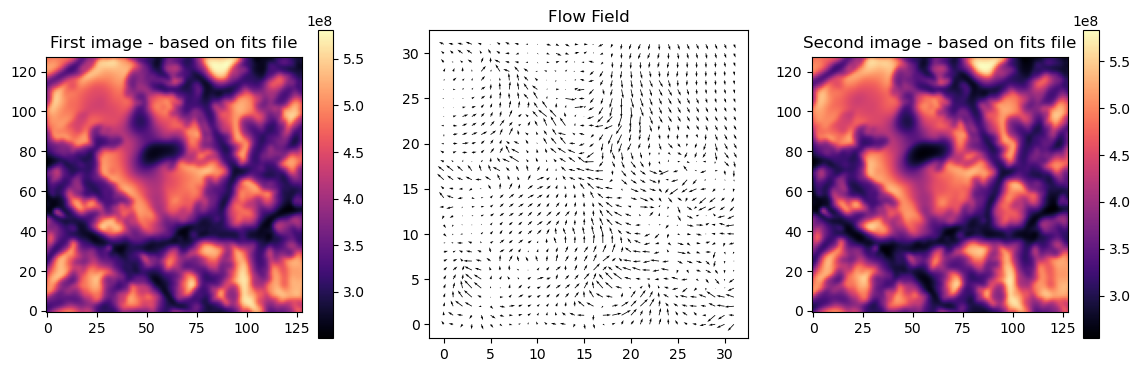

In [16]:
# Trying out intensity as windowing parameter

image1 = cube[0]
image2 = cube[1]
i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
ax1.set_xlabel = ("X pixel")
ax1.set_ylabel = ("Y pixel")
plt.imshow(image1[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First image - based on fits file")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_mean[0,i_start:i_end:4, j_start:j_end:4], Vy_mean[0,i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field") #FLCT

# Plot the shifted image
ax3 = fig.add_subplot(133)
ax3.set_xlabel = ("X pixel")
ax3.set_ylabel = ("Y pixel")
plt.imshow(image2[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second image - based on fits file")
plt.colorbar()

Text(0.5, 1.0, 'Flow Field for $\\Delta t=10, \\quad \\mathrm{FWHM}=1200$')

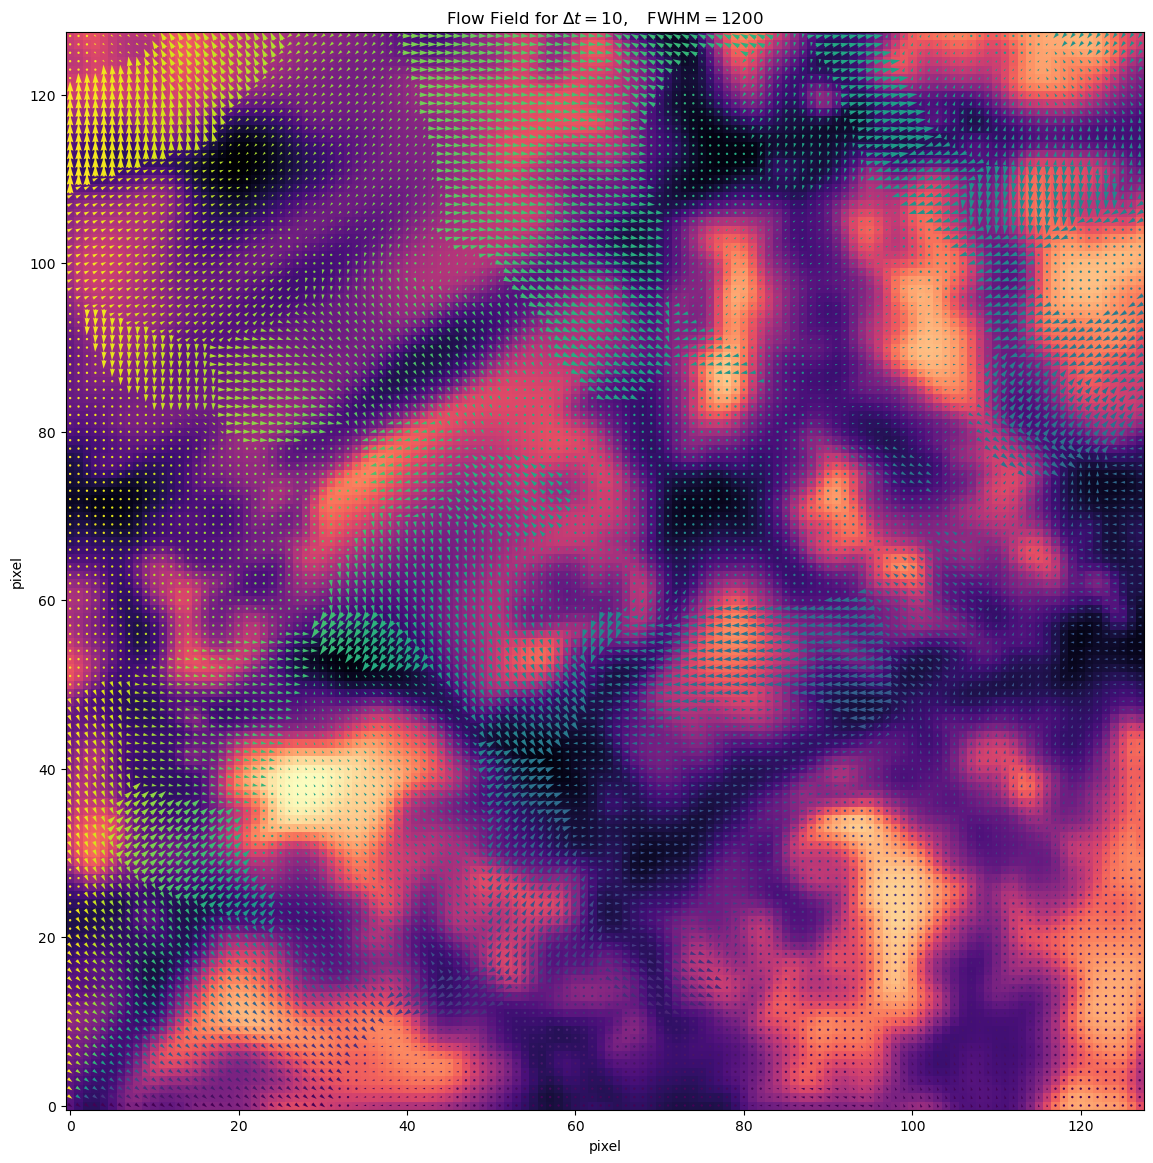

In [51]:
image1 = cube[0]
image2 = cube[1]
i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted 
X = np.arange(0, 128, 1)
Y = np.arange(0, 128, 1)
U, V = np.meshgrid(X, Y)


fig = plt.figure(figsize = (14, 14))
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.imshow(image2[i_start:i_end, j_start:j_end], origin = "lower", cmap = "magma")
plt.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vel_x_I[0,i_start:i_end, j_start:j_end], Vel_y_I[0,i_start:i_end, j_start:j_end], np.arctan2(V, U), angles='xy', scale_units='xy', pivot='mid', color="g")

plt.title("Flow Field for " + r'$\Delta t=10, \quad \mathrm{FWHM}=1200$') #FLCT

Text(0.5, 1.0, 'Flow Field for $\\Delta t=30, \\quad \\mathrm{FWHM}=1200$')

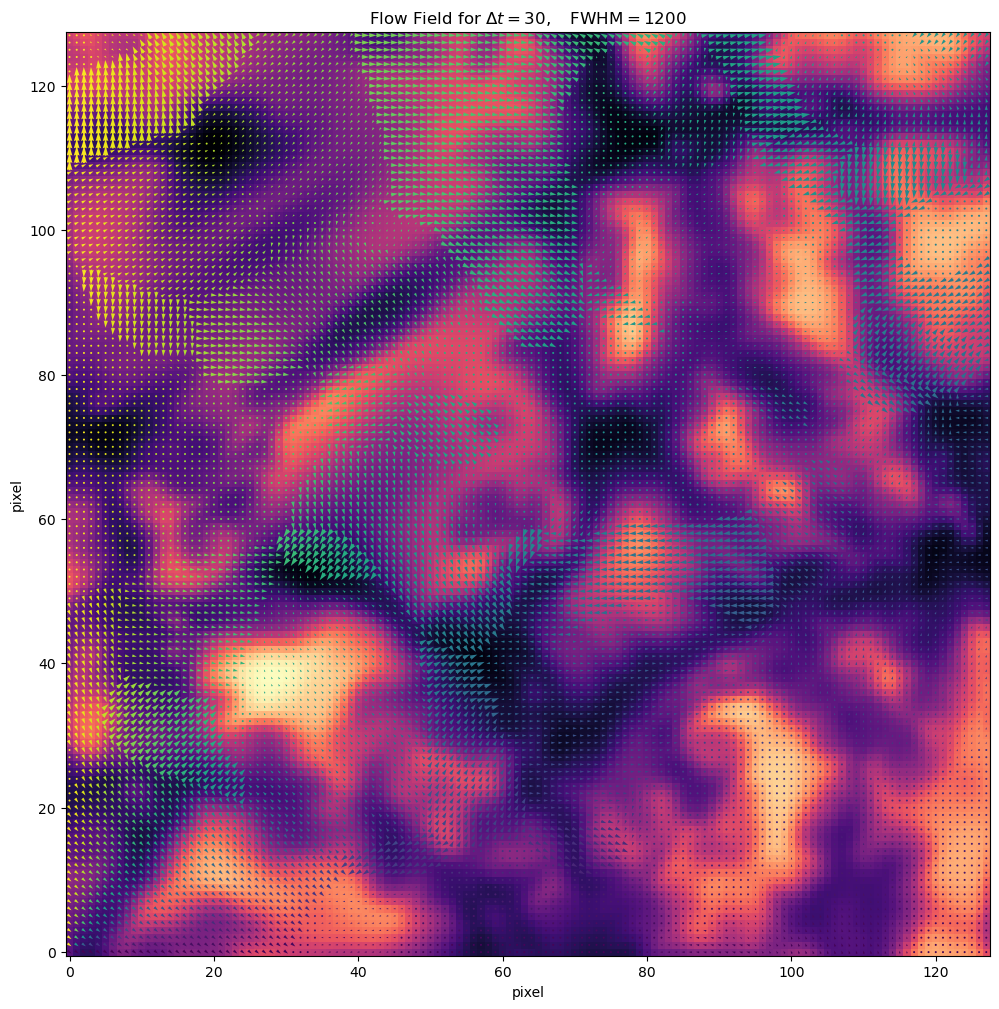

In [55]:
# every 50ith input of cube 50x30s between two images
image1 = cube[0]
image2 = cube[1]
i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted 
X = np.arange(0, 128, 1)
Y = np.arange(0, 128, 1)
U, V = np.meshgrid(X, Y)


fig = plt.figure(figsize = (12, 12))
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.imshow(image2[i_start:i_end, j_start:j_end], origin = "lower", cmap = "magma")
plt.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vel_x_I[0,i_start:i_end, j_start:j_end], Vel_y_I[0,i_start:i_end, j_start:j_end], np.arctan2(V, U), angles='xy', scale_units='xy', pivot='mid', color="g")

plt.title("Flow Field for " + r'$\Delta t=30, \quad \mathrm{FWHM}=1200$') #FLCT

Text(0.5, 1.0, 'Flow Field for $\\Delta t=30, \\quad \\mathrm{FWHM}=2400$')

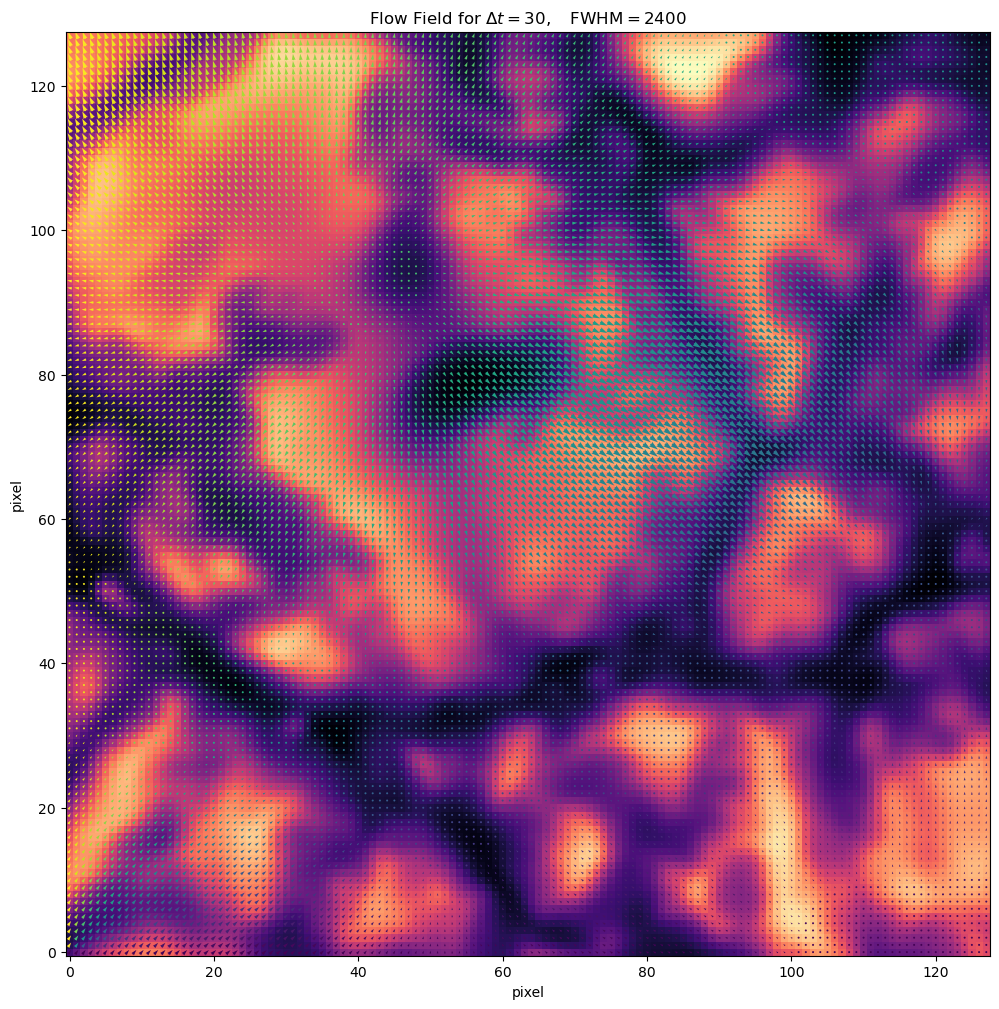

In [13]:
image1 = cube[0]
image2 = cube[1]
i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted 
X = np.arange(0, 128, 1)
Y = np.arange(0, 128, 1)
U, V = np.meshgrid(X, Y)


fig = plt.figure(figsize = (12, 12))
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.imshow(image2[i_start:i_end, j_start:j_end], origin = "lower", cmap = "magma")
plt.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vel_x_I[0,i_start:i_end, j_start:j_end], Vel_y_I[0,i_start:i_end, j_start:j_end], np.arctan2(V, U), angles='xy', scale_units='xy', pivot='mid', color="g")

plt.title("Flow Field for " + r'$\Delta t=30, \quad \mathrm{FWHM}=2400$') #FLCT

In [10]:
test_range = 99
Vx = fits.open("ISSI_2D_Tau=1.0-" + str(test_range) + "slices.fits")[2].data
Vy = fits.open("ISSI_2D_Tau=1.0-" + str(test_range) + "slices.fits")[3].data
Vx = Vx[:5]
Vy = Vy[:5]

In [11]:
Vx_mean = []
Vy_mean = []
for j in range(1, len(Vx)):
    vx = (Vx[j-1] + Vx[j])/2/1e5
    Vx_mean.append(vx)
    vy = (Vy[j-1] + Vy[j])/2/1e5
    Vy_mean.append(vy)

# Averaged, i.e mean Vx and Vy
Vx_mean = []
Vy_mean = []
for j in range(1, len(Vx)):
    vx = (Vx[j-1] + Vx[j])/2/1e5
    Vx_mean.append(vx)
    vy = (Vy[j-1] + Vy[j])/2/1e5
    Vy_mean.append(vy)

Vx_mean = np.asarray(Vx_mean)
Vy_mean = np.asarray(Vy_mean)

Text(0.5, 1.0, 'Flow Field - FLCT; continuum intensity windowing parameter')

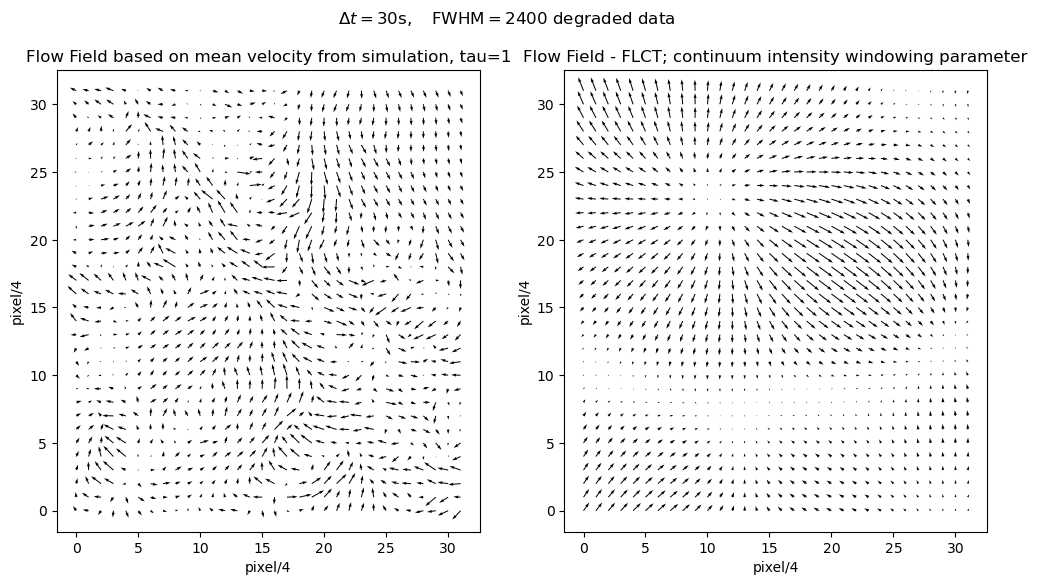

In [22]:
i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted 
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)


# Plotting the first image
fig = plt.figure(figsize=(12, 6))
fig.suptitle(r'$\Delta t=30\mathrm{s}, \quad \mathrm{FWHM}=2400$' + " degraded data")
ax1 = fig.add_subplot(121)
ax1.set_xlabel("pixel/4")
ax1.set_ylabel("pixel/4")
ax1.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_mean[0,i_start:i_end:4, j_start:j_end:4], Vy_mean[0,i_start:i_end:4, j_start:j_end:4])
ax1.set_title("Flow Field based on mean velocity from simulation, tau=1") 

ax2 = fig.add_subplot(122)
ax2.set_xlabel("pixel/4")
ax2.set_ylabel("pixel/4")
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
          Vel_x_I[0,i_start:i_end:4, j_start:j_end:4], Vel_y_I[0,i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field - FLCT; continuum intensity windowing parameter") 

<p>
    Brian said that this doesn't surprise him. What should be done is: spatial smearing the data from simulation to match the FWHM used during FLCT calculation. Secondly, small cadences like 10s are known to be problematic for FLCT in terms of it tracking the granules.
    Also, he will ask one of his students to send a python code that helps with display of flow fields. <br>
    He suggests to actually try all the combinations of delta t and FWHM in order to find which fits the best to this algorithm, after which we should do smearing to reduce actual velocities "to the sigma" that was used to define apodizing window that FLCT used on data.
    <br>
    Trebalo bi da se usrednji na t<sub>1/2</sub> koje je izmedju t<sub>initial</sub> and t<sub>final</sub>. Pitao me je da li je ovo za dva susedna frame-a.
</p>